In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv(r"C:\Users\LAVANYA\Desktop\Lavanya -DS notes and task\outflowset.csv")
data

,FMCG_CID,CurrentBalance,YearInflow,ManualTransactions,onlineTransactions,TotalTransactions,NoOfclosedAccounts,NewAccountsOpened,No.ofchequeBounces,No.of failedtransactions,YearOutflow,OverallPerspective
0,191416,69016351,91506260144,881084,80508181,81388116,628,2568,1920,5815035,70559611954,2
1,209212,78967829,39488497795,938424,376237471,377174919,657,4848,1226,2064860,76650316850,1
2,198656,90414487,20882686190,15711,447244560,447256753,171,4161,9660,7078893,34697341013,0
3,112274,6280075,99570394528,696044,750336814,751030847,1023,7990,7477,5060759,52716316728,2
4,167709,20924361,31245289761,335402,145805047,146138325,905,9150,553,1623524,68610729503,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3557,177533,89792390,88959137721,304574,504674620,504975877,26991,6101,668,1665960,72733464307,2
3558,192011,95023319,7074381001,272775,537784287,538055290,63435,6368,7203,8969347,28044973777,0
3559,139443,18181001,85874788913,310596,522989501,523299375,33197,9347,7794,7907897,65412672883,2
3560,115618,2740737,53955602808,525284,434064343,434587065,55634,4733,2029,113484,66252535841,1


In [6]:
x=data.drop(columns='OverallPerspective') 
y=data['OverallPerspective']

In [7]:
x

,FMCG_CID,CurrentBalance,YearInflow,ManualTransactions,onlineTransactions,TotalTransactions,NoOfclosedAccounts,NewAccountsOpened,No.ofchequeBounces,No.of failedtransactions,YearOutflow
0,191416,69016351,91506260144,881084,80508181,81388116,628,2568,1920,5815035,70559611954
1,209212,78967829,39488497795,938424,376237471,377174919,657,4848,1226,2064860,76650316850
2,198656,90414487,20882686190,15711,447244560,447256753,171,4161,9660,7078893,34697341013
3,112274,6280075,99570394528,696044,750336814,751030847,1023,7990,7477,5060759,52716316728
4,167709,20924361,31245289761,335402,145805047,146138325,905,9150,553,1623524,68610729503
...,...,...,...,...,...,...,...,...,...,...,...
3557,177533,89792390,88959137721,304574,504674620,504975877,26991,6101,668,1665960,72733464307
3558,192011,95023319,7074381001,272775,537784287,538055290,63435,6368,7203,8969347,28044973777
3559,139443,18181001,85874788913,310596,522989501,523299375,33197,9347,7794,7907897,65412672883
3560,115618,2740737,53955602808,525284,434064343,434587065,55634,4733,2029,113484,66252535841


In [8]:
y

0       2
1       1
2       0
3       2
4       1
       ..
3557    2
3558    0
3559    2
3560    1
3561    0
Name: OverallPerspective, Length: 3562, dtype: int64

In [11]:
#RF
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler


In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (2671, 11)
X Test  :  (891, 11)
Y Train :  (2671,)
Y Test  :  (891,)


In [14]:
#entropy
clfr=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)

clfr.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [15]:
#gini index

clfr1=RandomForestClassifier(n_estimators=10,criterion='gini',random_state=0)

clfr1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [16]:
ypre=clfr.predict(X_test)#entropy prediction
ypre1=clfr1.predict(X_test)#gini entropy prediction

In [17]:
a=metrics.accuracy_score(y_test,ypre)
print('entropy Accuracy Score of entropy:',a*100)

entropy Accuracy Score of entropy: 96.07182940516273


In [18]:
g=metrics.accuracy_score(y_test,ypre1)
print('entropy Accuracy Score of gini:',g*100)

entropy Accuracy Score of gini: 95.39842873176207


In [19]:
print('entropy - confusion matrix\n--------------------\n')
print(metrics.confusion_matrix(y_test,ypre))
print('gini - confusion matrix\n--------------------\n')
print(metrics.confusion_matrix(y_test,ypre1))

entropy - confusion matrix
--------------------

[[206   9   0]
 [  6 474   4]
 [  0  16 176]]
gini - confusion matrix
--------------------

[[195  20   0]
 [  4 478   2]
 [  0  15 177]]


In [20]:
print('entropy result\n--------------')
print(metrics.classification_report(y_test,ypre))
print('gini index result\n----------------------')
print(metrics.classification_report(y_test,ypre1))

entropy result
--------------
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       215
           1       0.95      0.98      0.96       484
           2       0.98      0.92      0.95       192

    accuracy                           0.96       891
   macro avg       0.97      0.95      0.96       891
weighted avg       0.96      0.96      0.96       891

gini index result
----------------------
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       215
           1       0.93      0.99      0.96       484
           2       0.99      0.92      0.95       192

    accuracy                           0.95       891
   macro avg       0.97      0.94      0.95       891
weighted avg       0.96      0.95      0.95       891



In [22]:
#knn
from sklearn.neighbors import  KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3) # here n_neighbors is k 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)


X Train :  (2849, 11)
X Test  :  (713, 11)
Y Train :  (2849,)
Y Test  :  (713,)


In [23]:
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

C:\Users\LAVANYA\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [24]:
met=metrics.confusion_matrix(y_test,predictions)
met

array([[174,   5,   0],
       [  5, 376,   2],
       [  0,   2, 149]], dtype=int64)

In [26]:
print("classification report",metrics.classification_report(y_test,predictions))


classification report               precision    recall  f1-score   support

           0       0.97      0.97      0.97       179
           1       0.98      0.98      0.98       383
           2       0.99      0.99      0.99       151

    accuracy                           0.98       713
   macro avg       0.98      0.98      0.98       713
weighted avg       0.98      0.98      0.98       713



In [28]:
print("Accuracy score of KNN is",metrics.accuracy_score(y_test,predictions)*100)

Accuracy score of KNN is 98.03646563814866


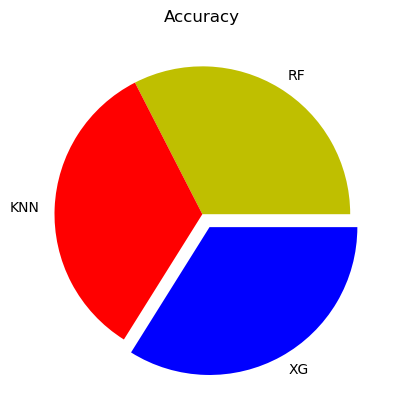

In [6]:
#The best algorithm for this dataset is XG_Boost with 99%

import matplotlib.pyplot as plt

accuracy = [95,98,99]
color_code = ['y','r','b']
deviate_fraction = [0,0,0.1]
Algorithm = ['RF','KNN','XG']
plt.pie(accuracy,colors=color_code,labels=Algorithm,explode=deviate_fraction)
plt.title('Accuracy')
plt.show()